# Imports, data loading, and utils

In [1]:
import sys
sys.path.append("..")
import numpy as np
from IPython.display import display, Image
import drawsvg
from utils import load_json, pretty_print_json, draw_task_v2, output_drawing, analyze_task
from copy import deepcopy
main_data_path = '../arc-prize-2024/'

training_challenges  = load_json(main_data_path + 'data/arc-agi_training_challenges.json')
training_solutions  = load_json(main_data_path + 'data/arc-agi_training_solutions.json')
task_ids  = load_json(main_data_path + 'data/task_ids.json')

In [3]:
from utils import store_json, update_task_ids, check_duplication

data_path = 'data/t1.json'
ids_path = 'data/t1_ids.json'
figs_path = 'figs/t1/'

In [4]:
def apply_transition(task_ids, index, training_challenges, ids_path, transition_config, data_path, figs_path):
    """
    Apply specified transition to task data for given index

    Args:
        index: Task index number
        transition_config: Dictionary specifying transition details, e.g.:
            {
                '0': {
                    'name': 'enlarge',
                    'input': ['grid', '3']
                }
            }
    """
    # Get task data
    id = task_ids[f'{index}']
    task = deepcopy(training_challenges[id])

    if check_duplication(ids_path, id):
        # Create transition function that applies all transformations sequentially
        def transition(grid):
            grid_ = deepcopy(grid)
            # Apply each transformation in order
            for i in range(len(transition_config)):
                # Import required function for this step
                func_name = transition_config[str(i)]['name']
                func = globals()[func_name]

                # Get function arguments from config
                args = [grid_] + [eval(arg) if arg.isdigit() else arg
                                  for arg in transition_config[str(i)]['input'][1:]]
                # Apply this transformation
                grid_ = func(*args)
            return grid_

        # Apply transition to train and test data
        for item in task['train']:
            item['output'] = transition(item['input'])
        for item in task['test']:
            item['output'] = transition(item['input'])

        # Store results and create visualization
        store_json(id, transition_config, task, data_path)
        update_task_ids(ids_path, id)

        drawing = draw_task_v2(task, index, id, include_test=True)
        output_drawing(drawing, f'{figs_path}{index}_{id}.png')

        display(Image(filename=f'{figs_path}{index}_{id}.png'))
    else:
        print(f"'{id}' exists in t1_ids.json.")

# Index 0 - rotate_grid

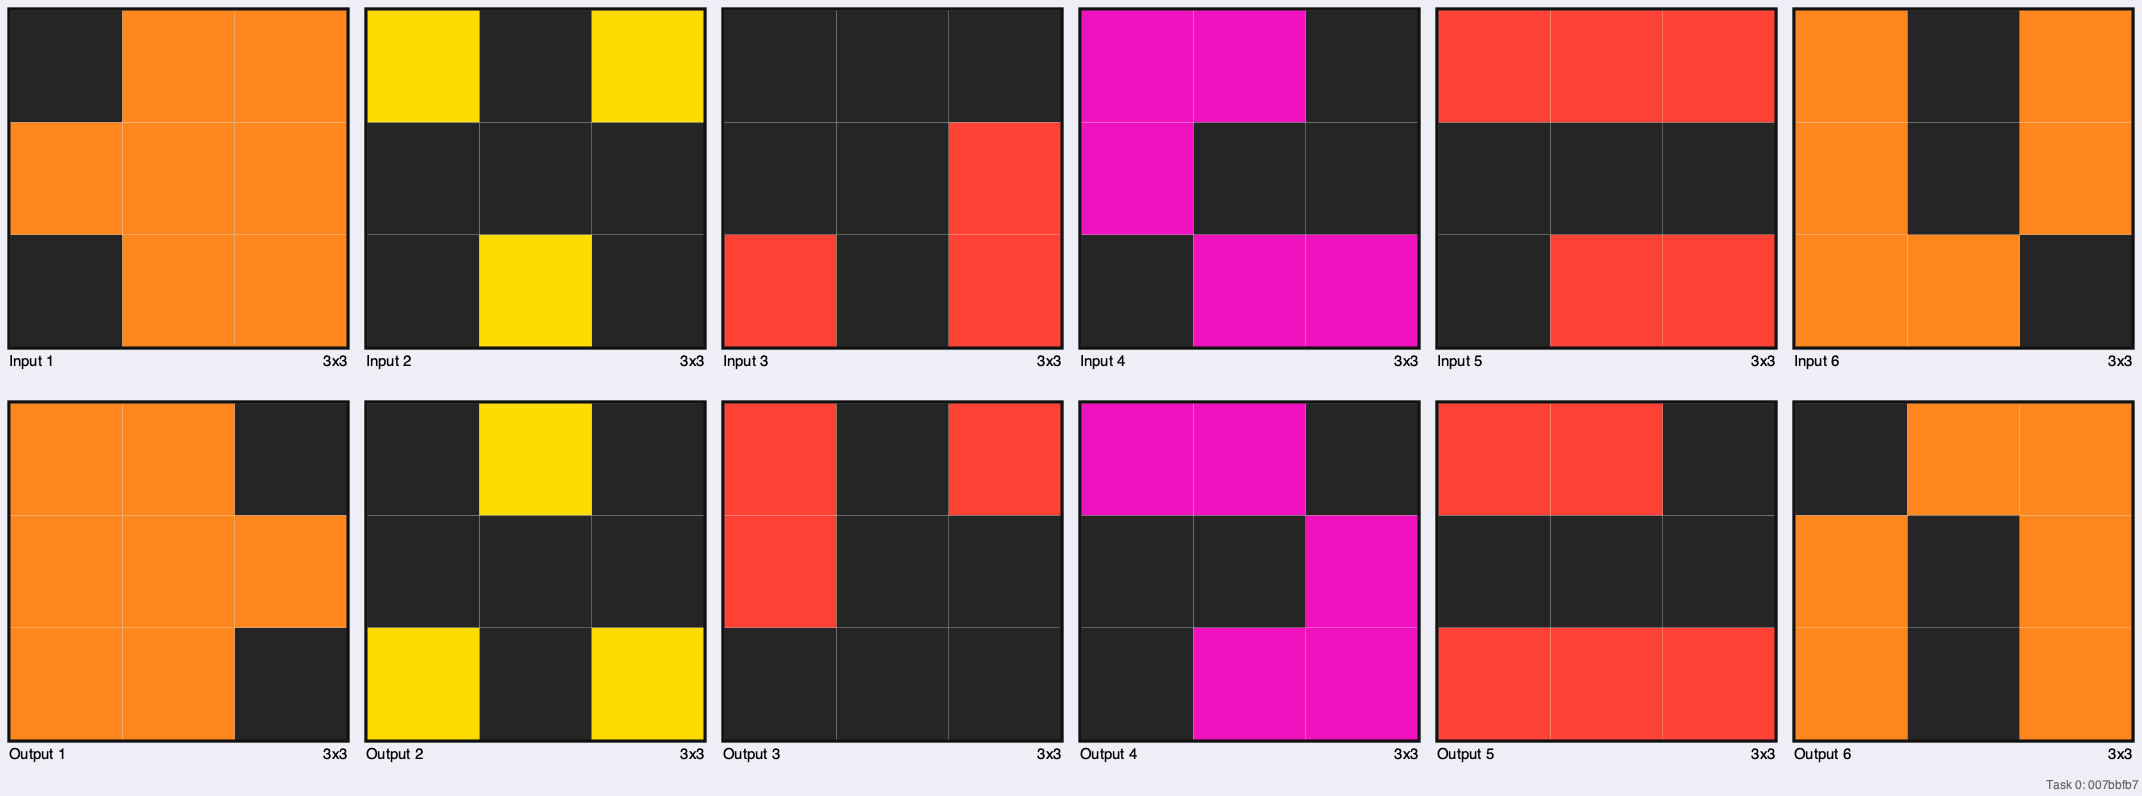

In [6]:
from blocks import rotate_grid

index = 0 

transition_config = {'0': 
        {
            'name': 'rotate_grid', 
            'input': ['grid', '180']
        },
}

apply_transition(task_ids, index, training_challenges, ids_path, transition_config, data_path, figs_path)


# Index 1 - mirror_grid

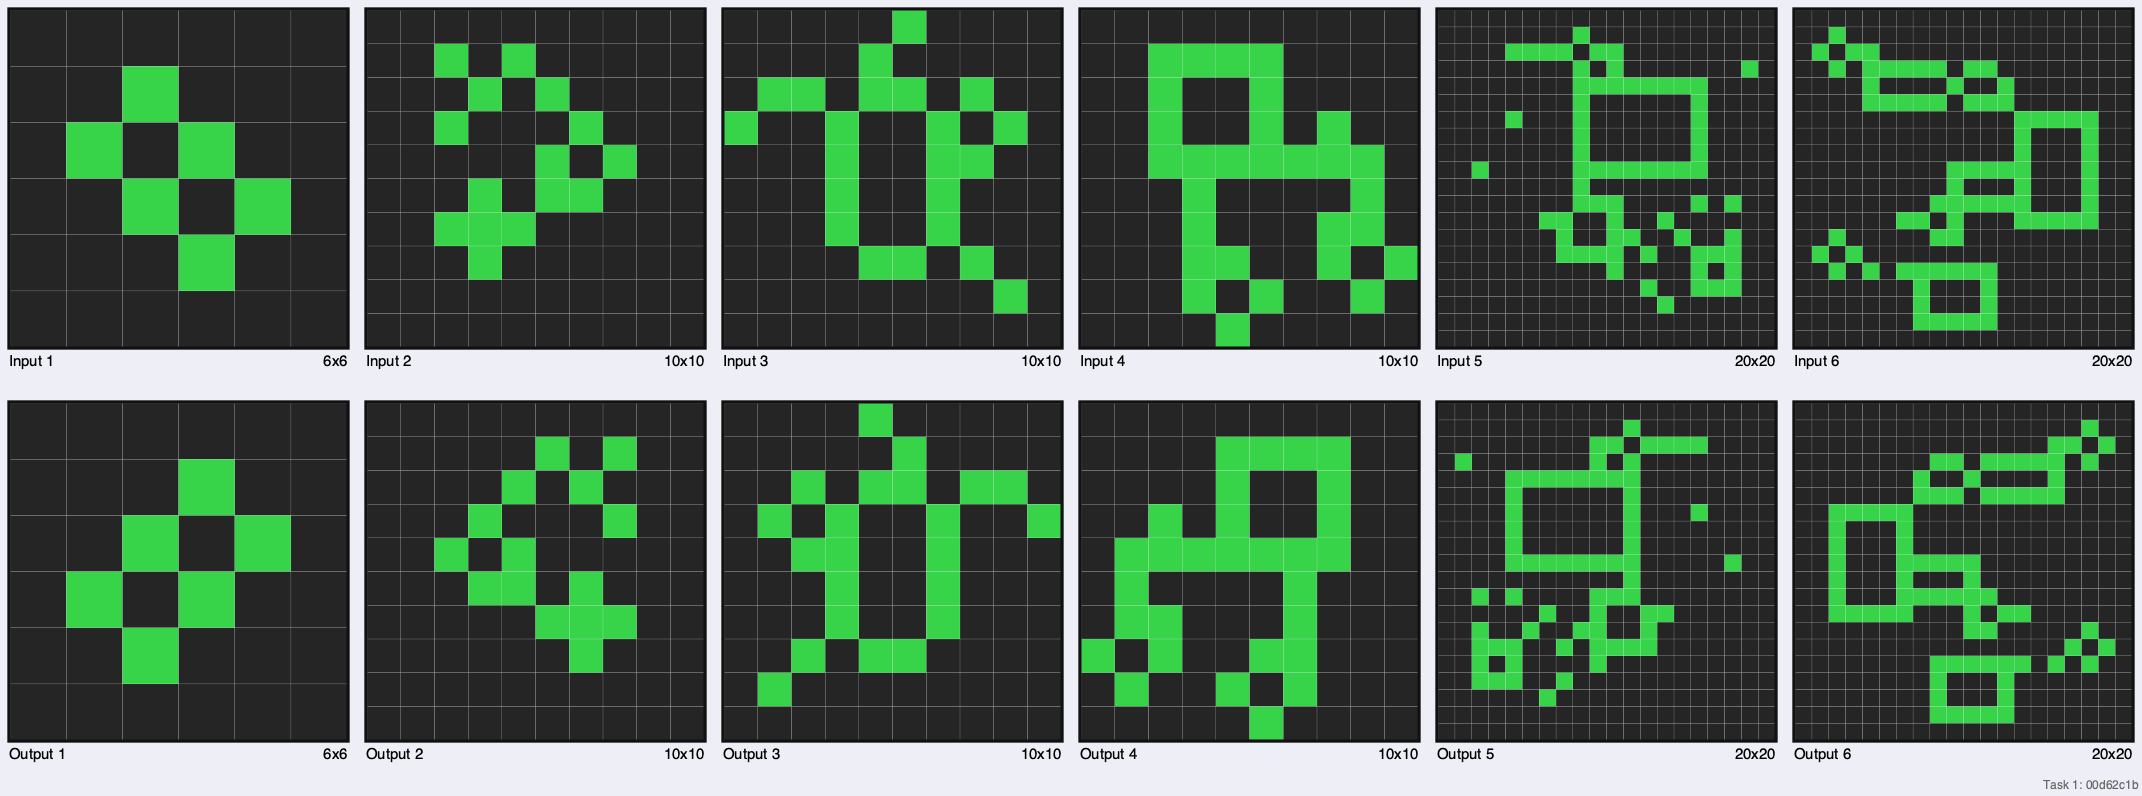

In [7]:
from blocks import mirror_grid

index = 1 

transition_config = {
    '0': 
        {
            'name': 'mirror_grid', 
            'input': ['grid', 'hor']
        },
}

apply_transition(task_ids, index, training_challenges, ids_path, transition_config, data_path, figs_path)

# Index 2 - shift_grid

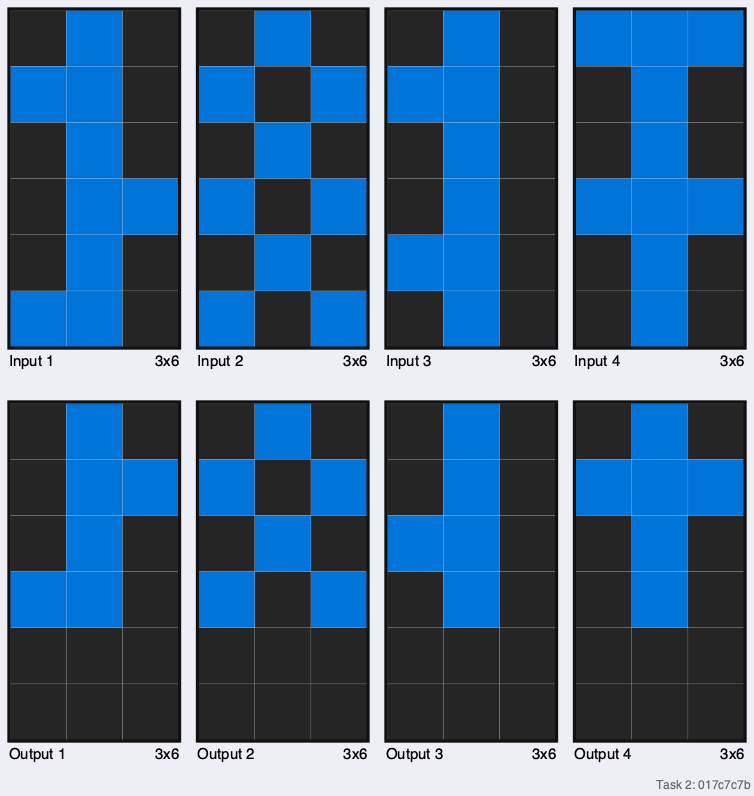

In [8]:
from blocks import shift_grid

index = 2

transition_config = {
    '0': 
        {
            'name': 'shift_grid', 
            'input': ['grid', 'up', '2']
        },
}

apply_transition(task_ids, index, training_challenges, ids_path, transition_config, data_path, figs_path)

# Index 3 - crop_grid

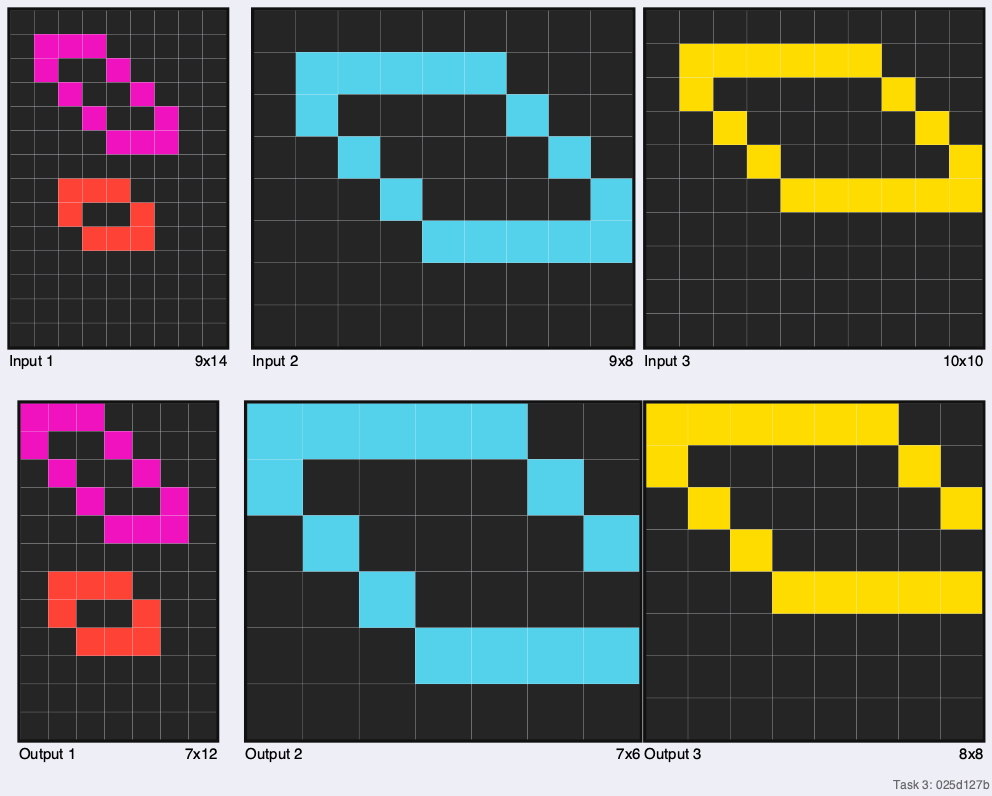

In [9]:
from blocks import crop_grid

index = 3

transition_config = {
    '0': 
        {
            'name': 'crop_grid', 
            'input': ['grid', '1', '1', '1', '1']
        },
}

apply_transition(task_ids, index, training_challenges, ids_path, transition_config, data_path, figs_path)

# Index 4 - draw_border

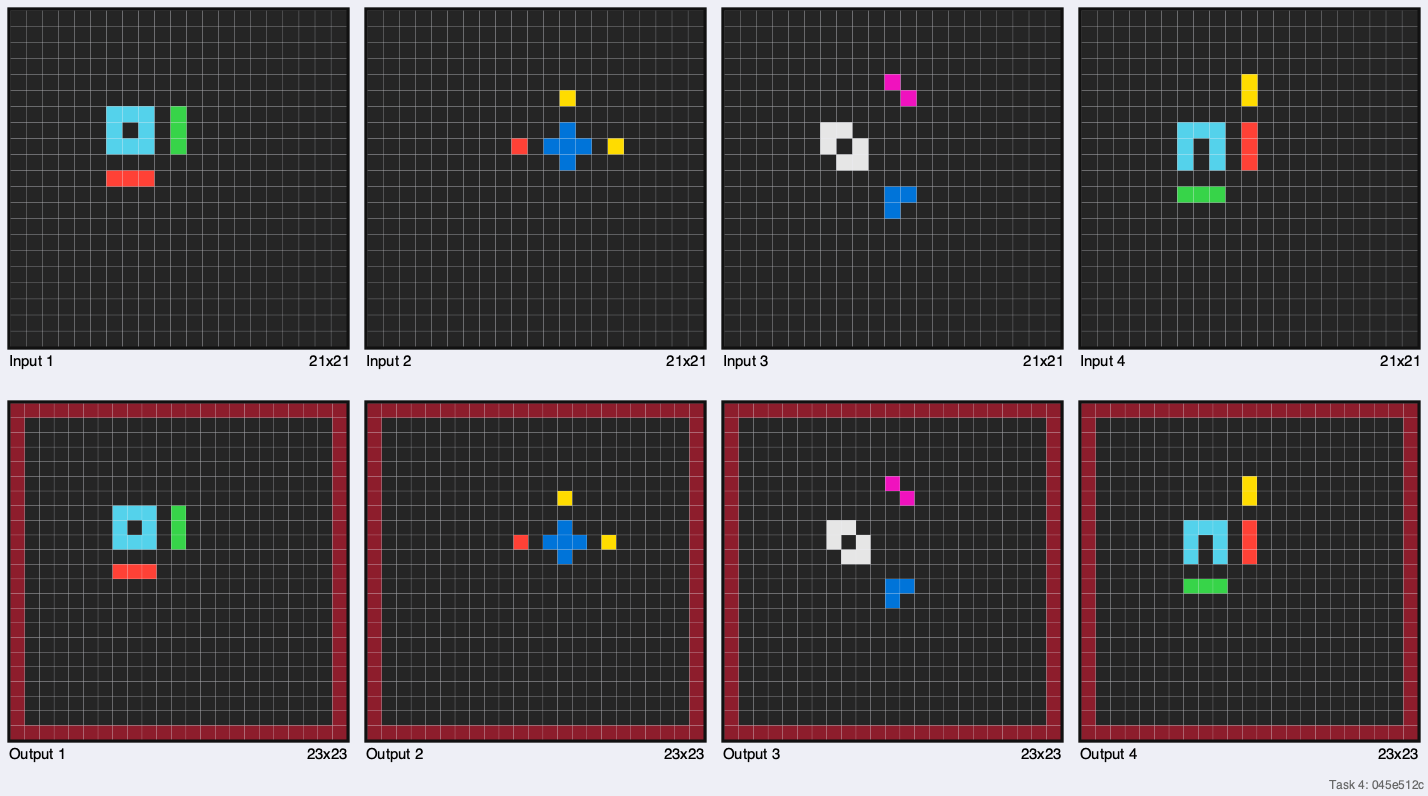

In [10]:
from blocks import draw_border

index = 4

transition_config = {
    '0': 
        {
            'name': 'draw_border', 
            'input': ['grid', '9']
        },
}

apply_transition(task_ids, index, training_challenges, ids_path, transition_config, data_path, figs_path)

# Index 5 - enlarge

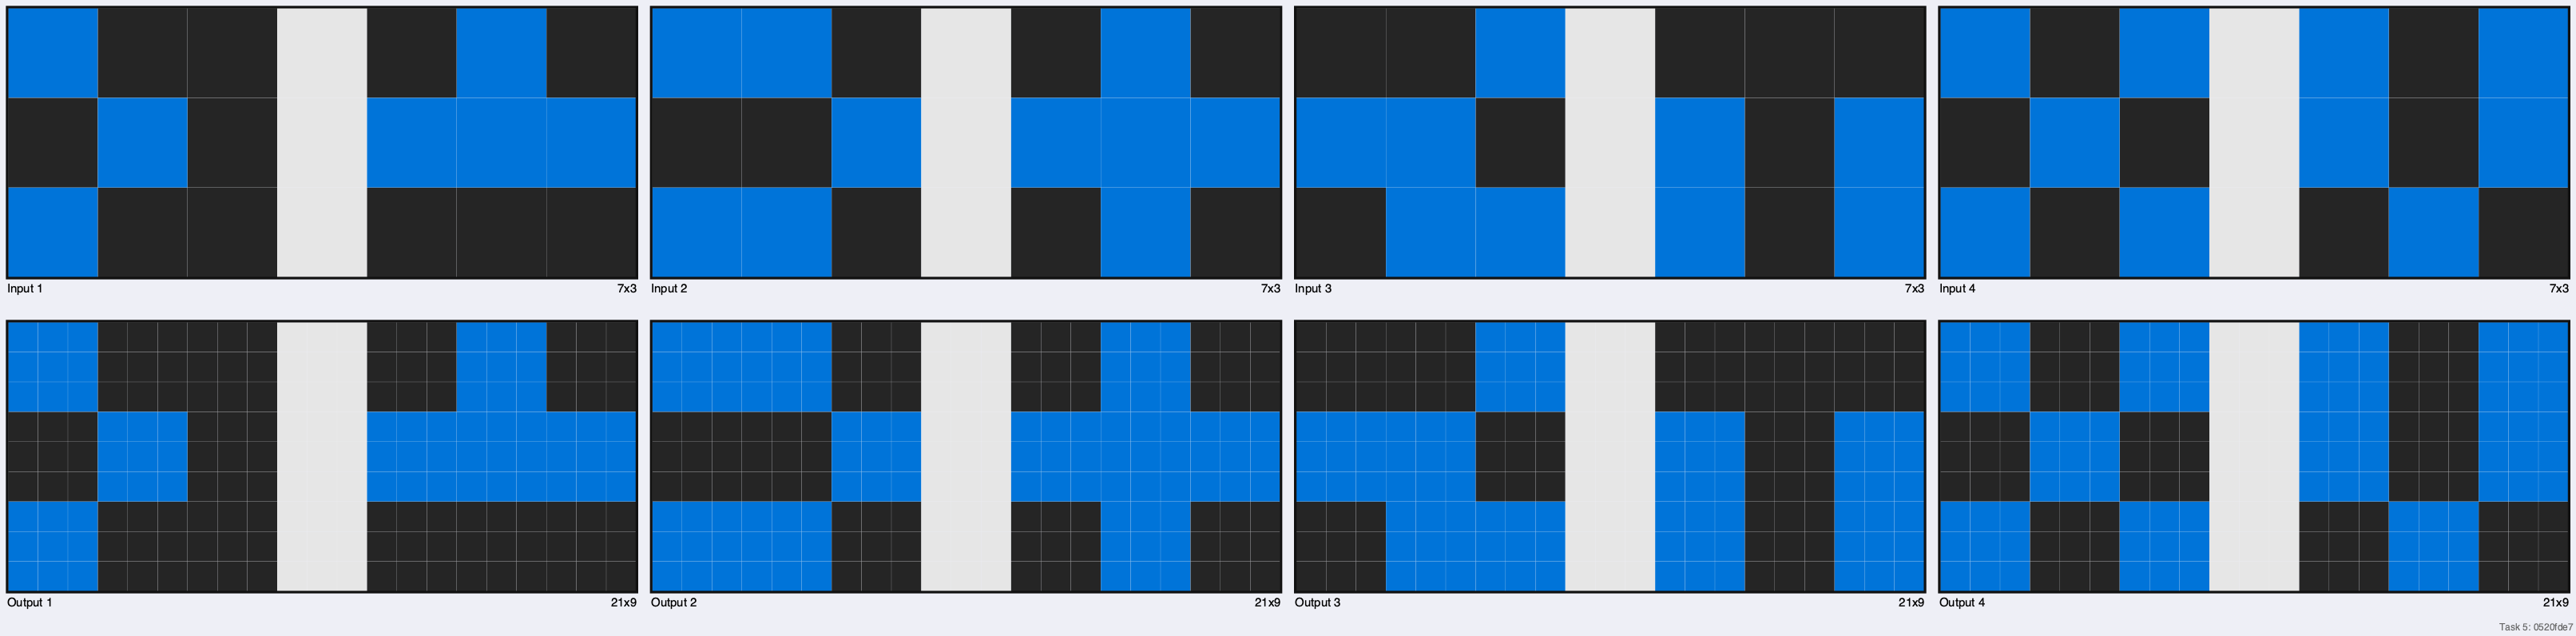

In [11]:
from blocks import enlarge

index = 5

transition_config = {
    '0': 
        {
            'name': 'enlarge', 
            'input': ['grid', '3']
        },
}

apply_transition(task_ids, index, training_challenges, ids_path, transition_config, data_path, figs_path)